# Coronavirus Global Cases Vizualisations

In [71]:
### import libraries
import pandas as pd #Dataframe manipulation library
import numpy as np #Library to handle data in a vectorized manner

import matplotlib.pyplot as plt #Matplotlib and associated plotting modules
import matplotlib.colors as mcolors
import matplotlib as mpl
from matplotlib import style

import math #Math functions
import requests #library to handle requests

import os
import random

import time
import datetime

import warnings
warnings.filterwarnings("ignore")

print('Libraries imported.')

Libraries imported.


In [72]:
###Import the data from CSSE at Johns Hopkins University (https://systems.jhu.edu/)
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [73]:
###Check the confirmed_df first five rows
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


In [74]:
###Index columns as DataFrame series
cols = confirmed_df.keys()

In [75]:
###Get all the dates for the outbreak
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [76]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
active_cases = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    total_recovered.append(recovered_sum)
    active_cases.append(confirmed_sum-(recovered_sum+death_sum))
    active_cases_sum=(confirmed_sum-(recovered_sum+death_sum)).sum()

In [77]:
###Convert integer into datetime for better visualization
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')

In [78]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
active_cases = np.array(active_cases).reshape(-1, 1)

In [79]:
###Future forecast
days_in_future = 3
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
adjusted_dates = future_forcast_dates[:-3]

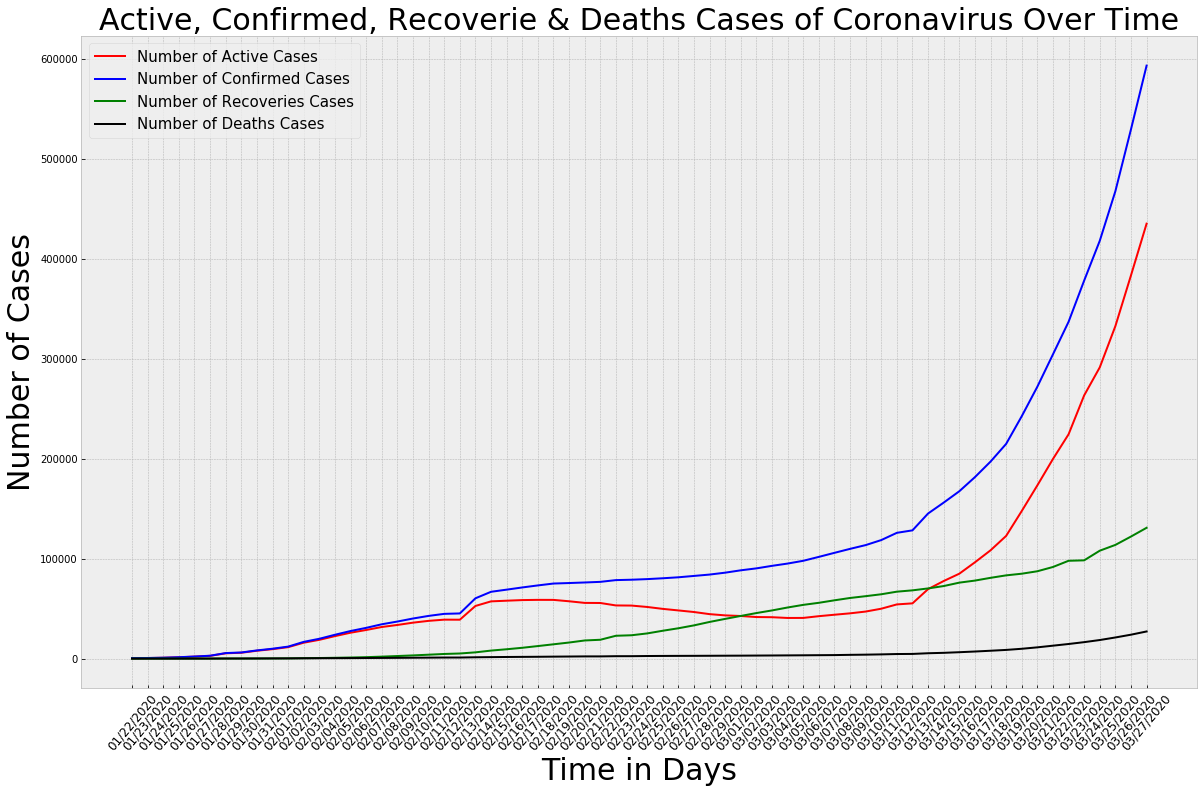

Number of Coronavirus confirmed cases : 593291
Number of Coronavirus active cases : 435178
Number of Coronavirus recovered cases : 130915
Number of Coronavirus deaths cases : 27198


In [80]:
#Coronavirus Active/Confirmed/Recoveries/Deaths Cases Over Time
plt.figure(figsize=(20, 12))
plt.style.use('bmh')
plt.plot(adjusted_dates, active_cases, color='red')
plt.plot(adjusted_dates, world_cases, color='blue')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.plot(adjusted_dates, total_deaths, color='black')
plt.title('Active, Confirmed, Recoverie & Deaths Cases of Coronavirus Over Time', size=30)
plt.legend(['Number of Active Cases','Number of Confirmed Cases', 'Number of Recoveries Cases', 'Number of Deaths Cases'], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(rotation=50, size=12)
plt.show()
print("Number of Coronavirus confirmed cases : "+ str(confirmed_sum))
print("Number of Coronavirus active cases : "+ str(active_cases_sum))
print("Number of Coronavirus recovered cases : "+ str(recovered_sum))
print("Number of Coronavirus deaths cases : "+ str(death_sum))

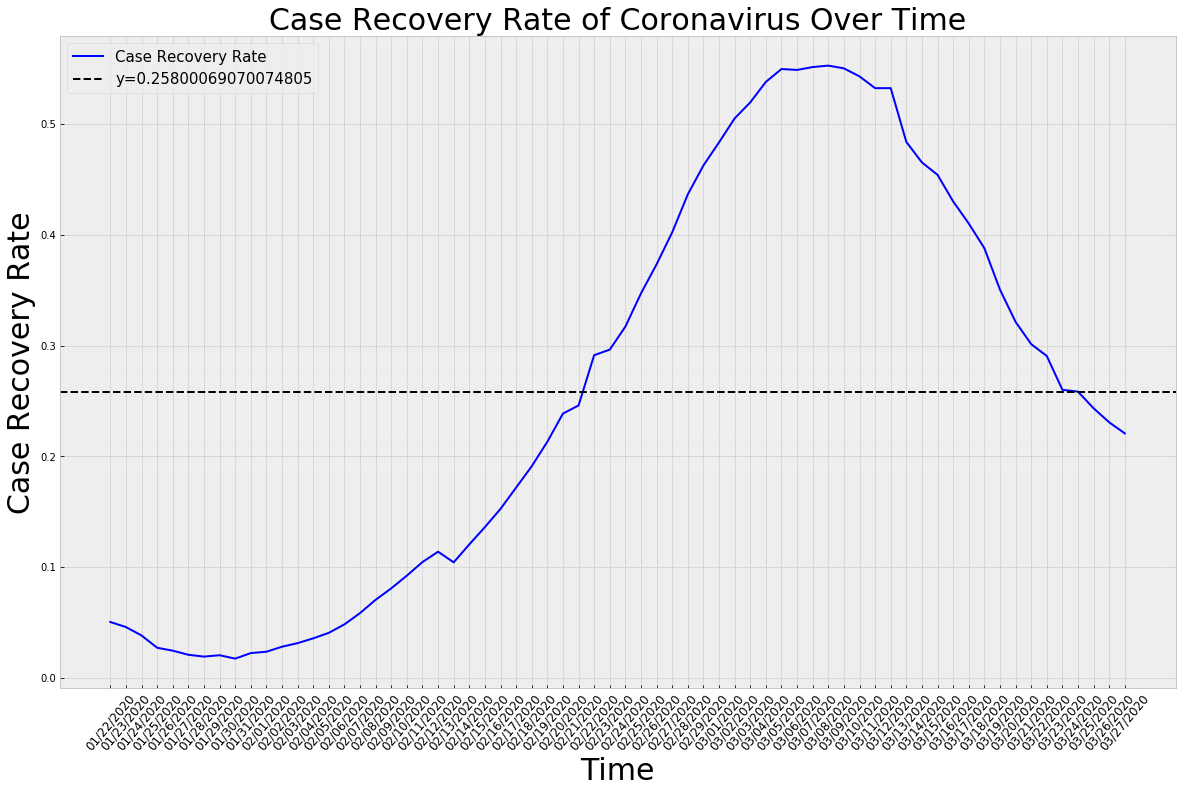

The Case Recovery Rate Percentage of Coronavirus is: 25.800069070074805


In [81]:
###Recovery Rate of Coronavirus Over Time
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Case Recovery Rate of Coronavirus Over Time', size=30)
plt.legend(['Case Recovery Rate', 'y='+str(mean_recovery_rate)], loc='upper left', fontsize=15)
plt.xlabel('Time', size=30)
plt.ylabel('Case Recovery Rate', size=30)
plt.xticks(rotation=50, size=12)
plt.show()
print ("The Case Recovery Rate Percentage of Coronavirus is: "+ str(mean_recovery_rate*100) )

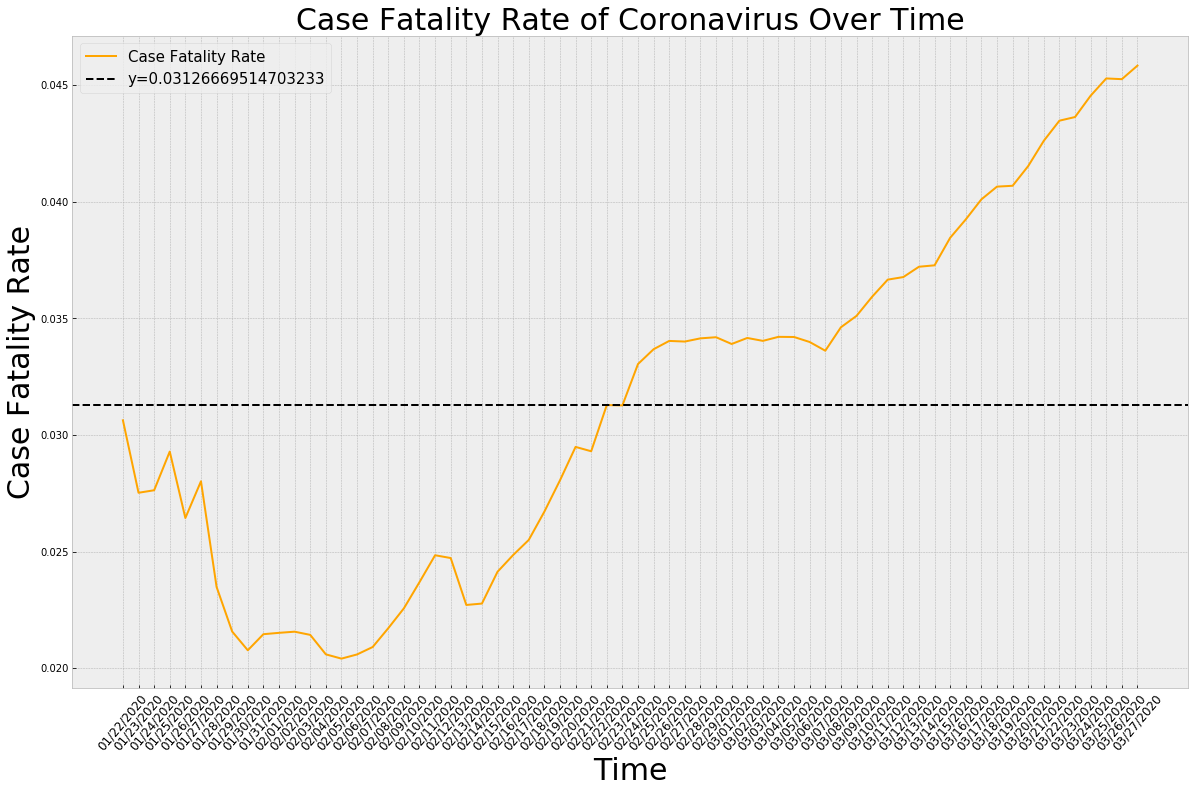

The Case Fatality Rate Percentage of Coronavirus is 3.1266695147032326


In [82]:
###Mortality Rate of Coronavirus Over Time
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Case Fatality Rate of Coronavirus Over Time', size=30)
plt.legend(['Case Fatality Rate', 'y='+str(mean_mortality_rate)], loc='upper left', fontsize=15)
plt.xlabel('Time', size=30)
plt.ylabel('Case Fatality Rate', size=30)
plt.xticks(rotation=50, size=12)
plt.show()
print("The Case Fatality Rate Percentage of Coronavirus is "+ str(mean_mortality_rate*100))

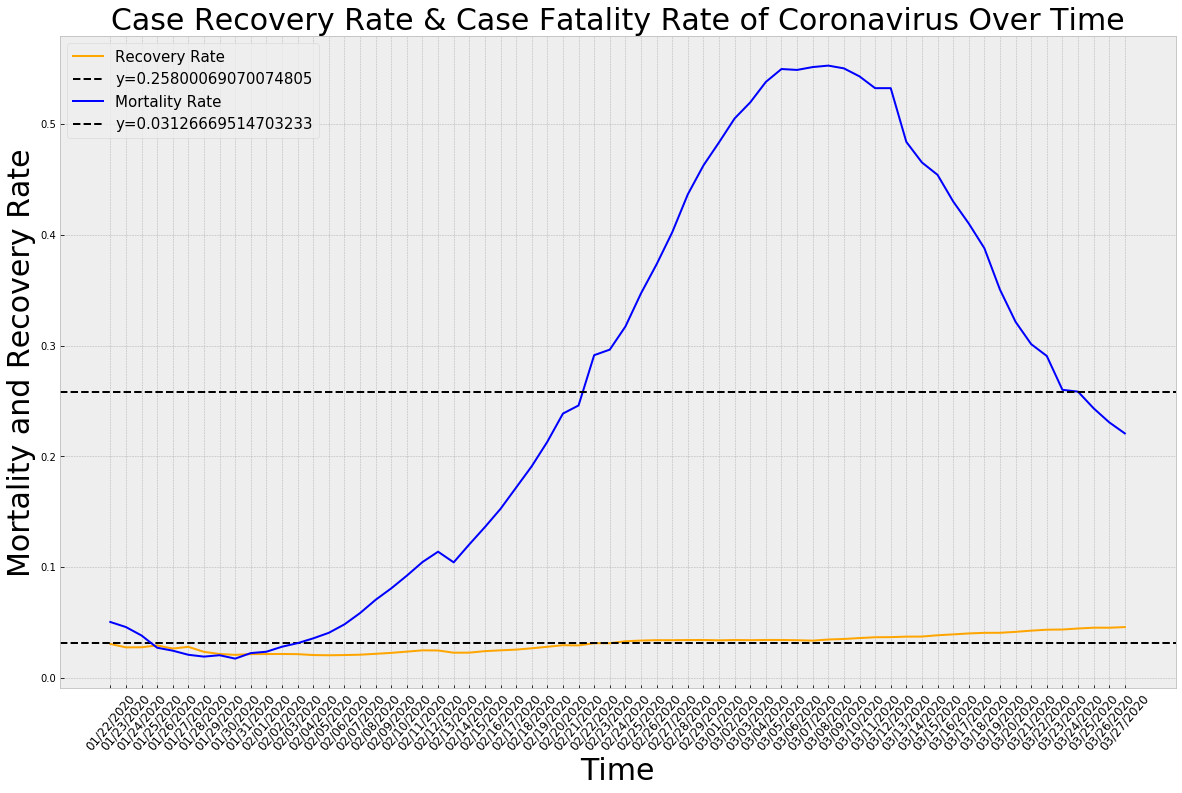

In [83]:
###Coronavirus Recovery & Mortality Rate Over Time
mean_recovery_rate = np.mean(recovery_rate)
mean_mortality_rate = np.mean(mortality_rate)

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Case Recovery Rate & Case Fatality Rate of Coronavirus Over Time', size=30)
plt.legend(['Recovery Rate', 'y='+str(mean_recovery_rate),'Mortality Rate', 'y='+str(mean_mortality_rate)], loc='upper left', fontsize=15)

plt.xlabel('Time', size=30)
plt.ylabel('Mortality and Recovery Rate', size=30)
plt.xticks(rotation=50, size=12)
plt.show()

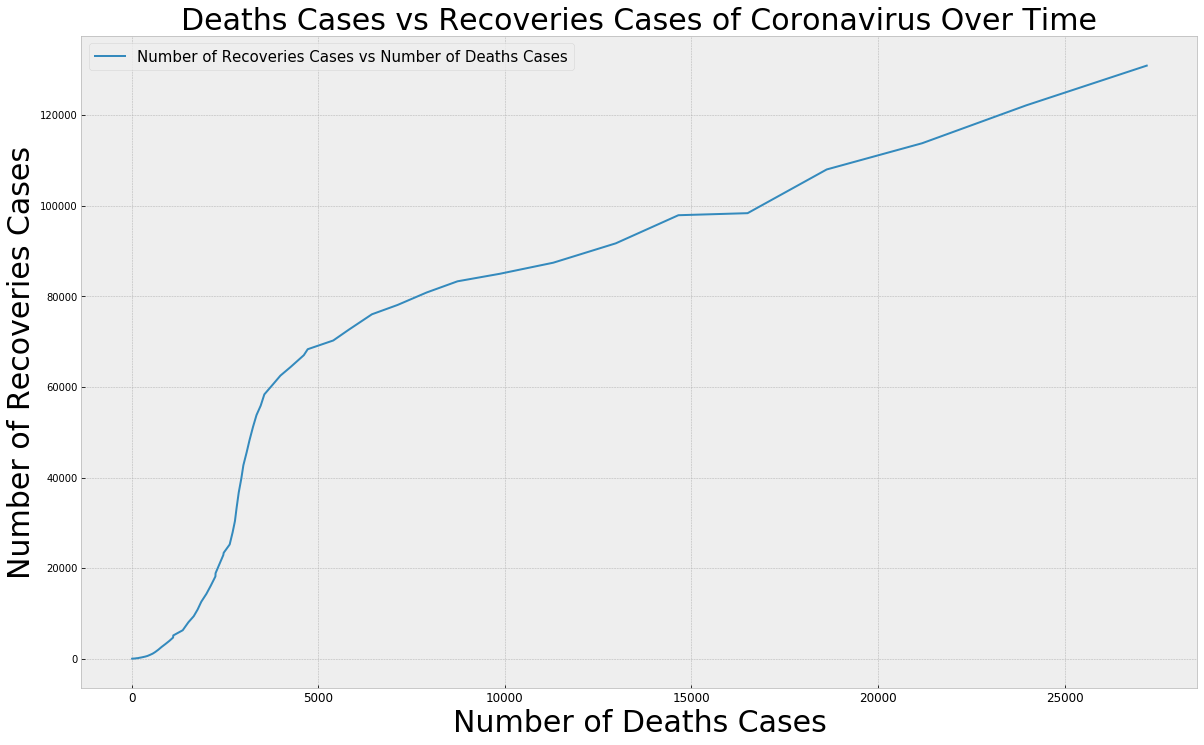

In [84]:
##Deaths Cases vs Recoveries Cases
plt.figure(figsize=(20, 12))
plt.plot(total_deaths, total_recovered)
plt.title('Deaths Cases vs Recoveries Cases of Coronavirus Over Time', size=30)
plt.legend(['Number of Recoveries Cases vs Number of Deaths Cases'], loc='upper left', fontsize=15)
plt.xlabel('Number of Deaths Cases', size=30)
plt.ylabel('Number of Recoveries Cases', size=30)
plt.xticks(size=12)
plt.show()

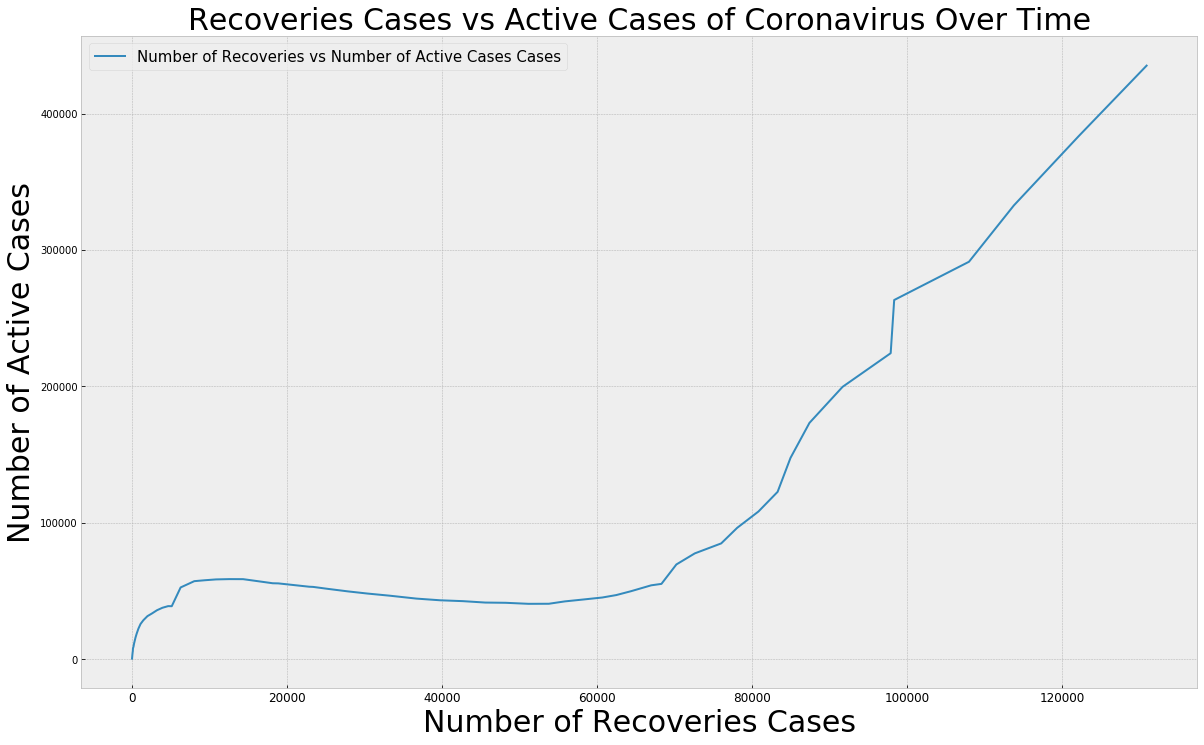

In [85]:
##Recoveries vs Active Cases Cases
plt.figure(figsize=(20, 12))
plt.plot(total_recovered, active_cases)
plt.title('Recoveries Cases vs Active Cases of Coronavirus Over Time', size=30)
plt.legend(['Number of Recoveries vs Number of Active Cases Cases'], loc='upper left', fontsize=15)
plt.xlabel('Number of Recoveries Cases', size=30)
plt.ylabel('Number of Active Cases', size=30)
plt.xticks(size=12)
plt.show()

## Coronavirus Predictions using Linear Regression & Support-Vector Machine (SVM) 

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [87]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.1, shuffle=False) 

In [88]:
kernel = ['linear', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed.ravel())
svm_search.best_params_
svm_confirmed = svm_search.best_estimator_
svm_predC = svm_confirmed.predict(future_forcast)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.0s finished


In [89]:
linear_model = LinearRegression(fit_intercept=False, normalize=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_predC = linear_model.predict(X_test_confirmed)
linear_predC = linear_model.predict(future_forcast)

In [90]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, total_recovered, test_size=0.1, shuffle=False) 

In [91]:
kernel = ['linear', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed.ravel())
svm_search.best_params_
svm_confirmed = svm_search.best_estimator_
svm_predR = svm_confirmed.predict(future_forcast)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.0s finished


In [92]:
linear_model = LinearRegression(fit_intercept=False, normalize=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_predR = linear_model.predict(X_test_confirmed)
linear_predR = linear_model.predict(future_forcast)

In [93]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, total_deaths, test_size=0.1, shuffle=False) 

In [94]:
kernel = ['linear', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed.ravel())
svm_search.best_params_
svm_confirmed = svm_search.best_estimator_
svm_predD = svm_confirmed.predict(future_forcast)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.0s finished


In [95]:
linear_model = LinearRegression(fit_intercept=False, normalize=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_predD = linear_model.predict(X_test_confirmed)
linear_predD = linear_model.predict(future_forcast)

In [96]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, active_cases, test_size=0.1, shuffle=False) 

In [97]:
kernel = ['linear', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed.ravel())
svm_search.best_params_
svm_confirmed = svm_search.best_estimator_
svm_predA = svm_confirmed.predict(future_forcast)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.0s finished


In [98]:
linear_model = LinearRegression(fit_intercept=False, normalize=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_predA = linear_model.predict(X_test_confirmed)
linear_predA = linear_model.predict(future_forcast)

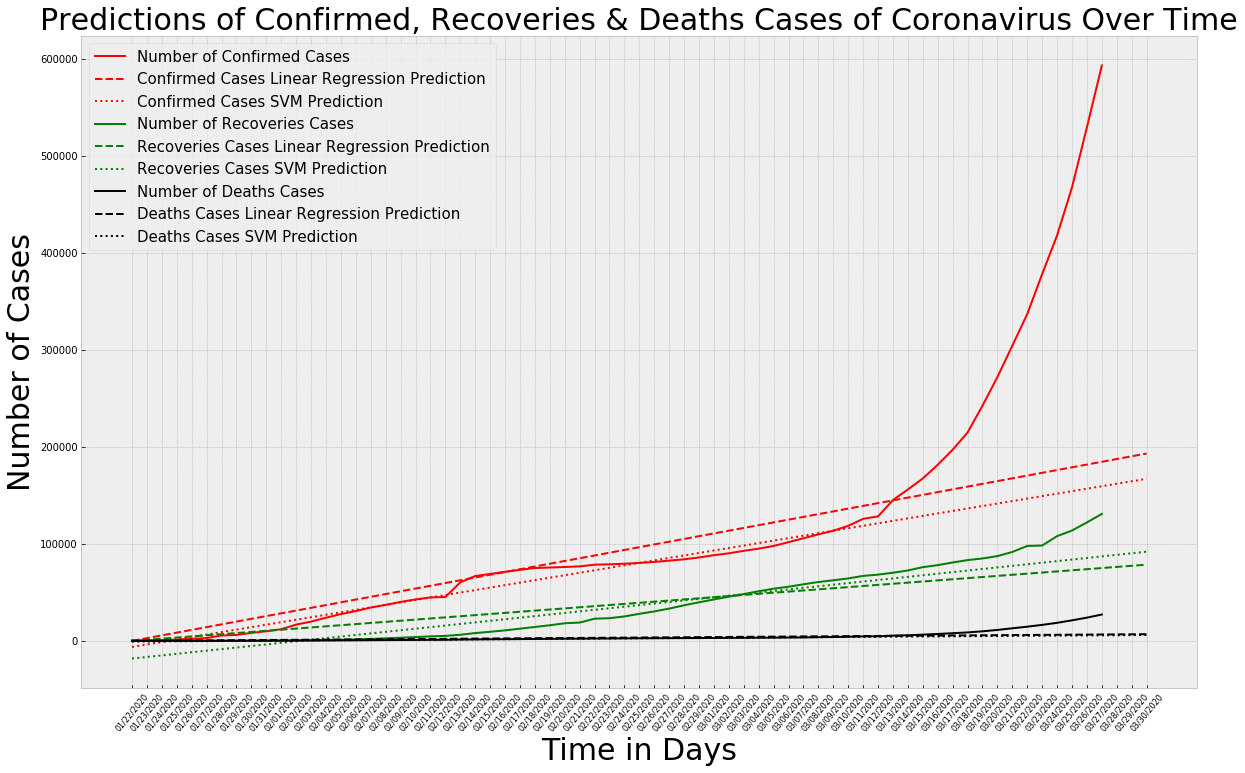

In [99]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases, color='red')
plt.plot(future_forcast_dates, linear_predC, linestyle='dashed', color='red')
plt.plot(future_forcast_dates, svm_predC, linestyle='dotted', color='red')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.plot(future_forcast_dates, linear_predR, linestyle='dashed', color='green')
plt.plot(future_forcast_dates, svm_predR, linestyle='dotted', color='green')
plt.plot(adjusted_dates, total_deaths, color='black')
plt.plot(future_forcast_dates, linear_predD, linestyle='dashed', color='black')
plt.plot(future_forcast_dates, svm_predD, linestyle='dotted', color='black')
plt.title('Predictions of Confirmed, Recoveries & Deaths Cases of Coronavirus Over Time', size=30)
plt.legend(['Number of Confirmed Cases', 'Confirmed Cases Linear Regression Prediction', 'Confirmed Cases SVM Prediction', 'Number of Recoveries Cases', 'Recoveries Cases Linear Regression Prediction', 'Recoveries Cases SVM Prediction', 'Number of Deaths Cases', 'Deaths Cases Linear Regression Prediction', 'Deaths Cases SVM Prediction', 'Number of Active Cases', 'Active Cases Linear Regression Prediction', 'Active Cases SVM Prediction'], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(rotation=50, size=8)
plt.show()

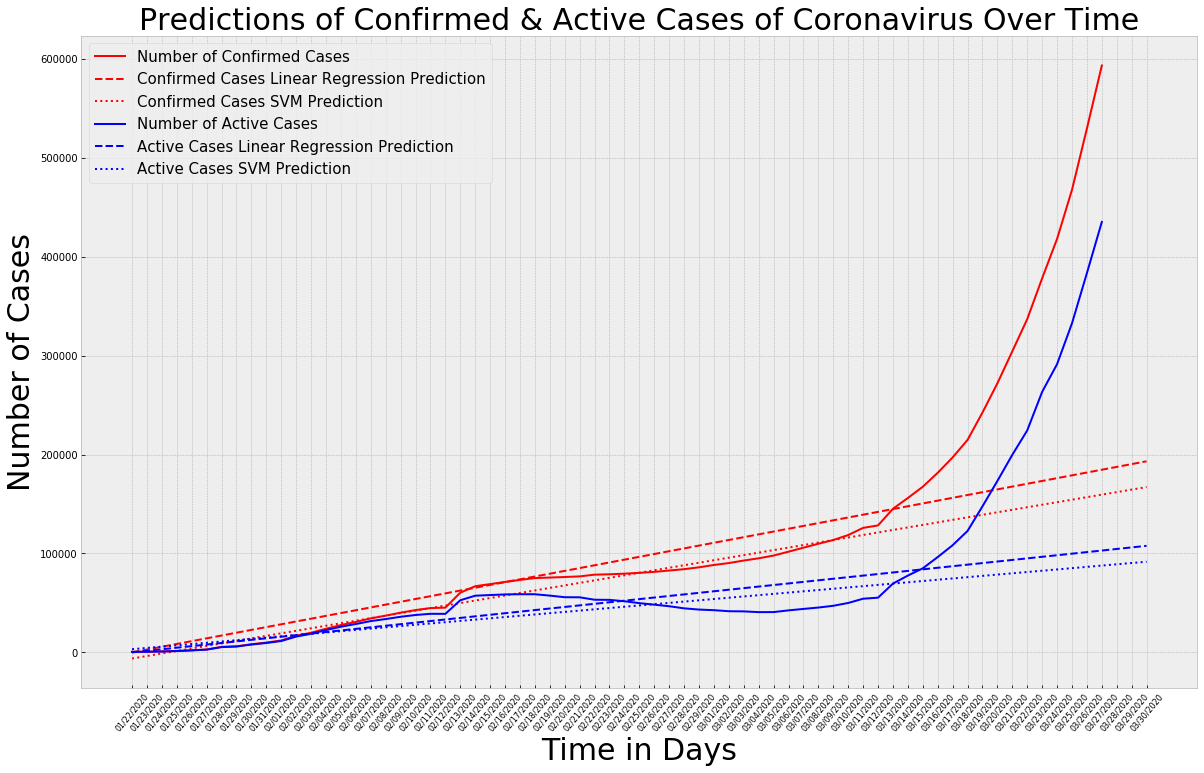

In [100]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases, color='red')
plt.plot(future_forcast_dates, linear_predC, linestyle='dashed', color='red')
plt.plot(future_forcast_dates, svm_predC, linestyle='dotted', color='red')
plt.plot(adjusted_dates, active_cases, color='blue')
plt.plot(future_forcast_dates, linear_predA, linestyle='dashed', color='blue')
plt.plot(future_forcast_dates, svm_predA, linestyle='dotted', color='blue')
plt.title('Predictions of Confirmed & Active Cases of Coronavirus Over Time', size=30)
plt.legend(['Number of Confirmed Cases', 'Confirmed Cases Linear Regression Prediction', 'Confirmed Cases SVM Prediction', 'Number of Active Cases', 'Active Cases Linear Regression Prediction', 'Active Cases SVM Prediction'], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(rotation=50, size=8)
plt.show()

In [101]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, recovery_rate, test_size=0.1, shuffle=False) 

In [102]:
kernel = ['linear', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}
svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)
svm_search.best_params_
svm_confirmed = svm_search.best_estimator_
svm_predRR = svm_confirmed.predict(future_forcast)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.8s finished


In [103]:
linear_model = LinearRegression(fit_intercept=False, normalize=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_predRR = linear_model.predict(X_test_confirmed)
linear_predRR = linear_model.predict(future_forcast)

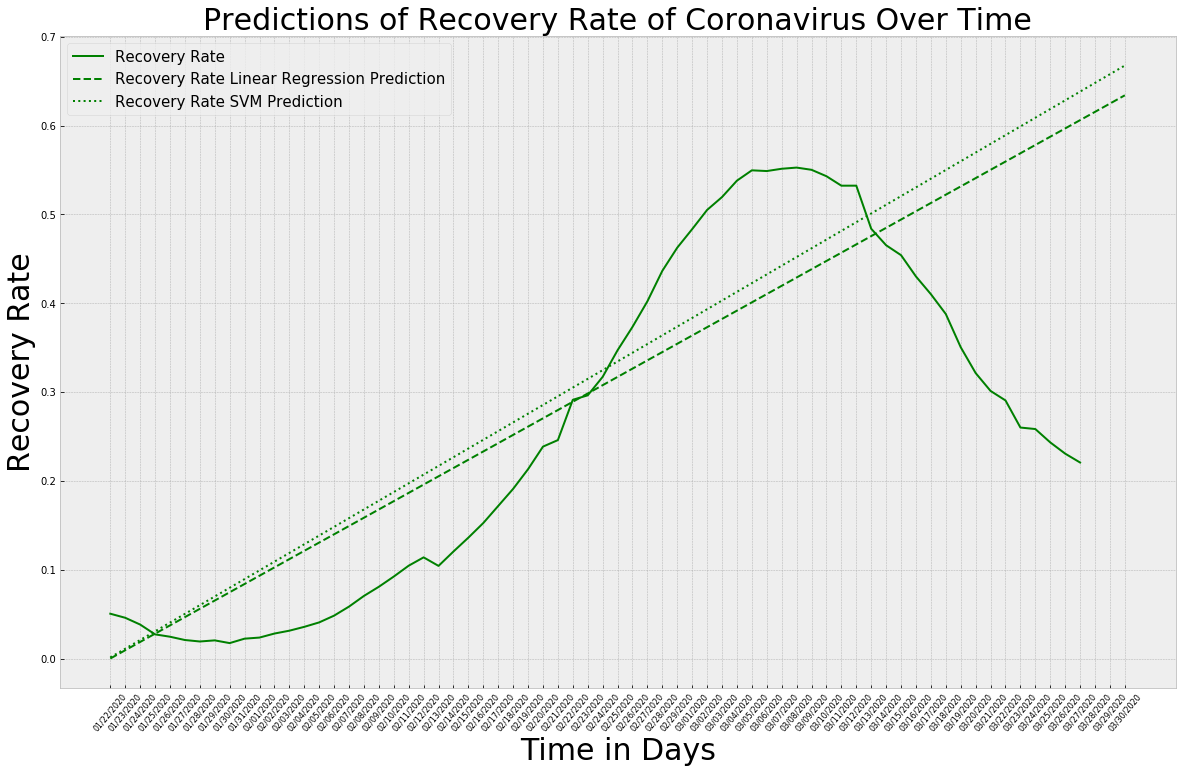

In [104]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, recovery_rate, color='green')
plt.plot(future_forcast_dates, linear_predRR, linestyle='dashed', color='green')
plt.plot(future_forcast_dates, svm_predRR, linestyle='dotted', color='green')
plt.title('Predictions of Recovery Rate of Coronavirus Over Time', size=30)
plt.legend(['Recovery Rate', 'Recovery Rate Linear Regression Prediction', 'Recovery Rate SVM Prediction'], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(rotation=50, size=8)
plt.show()

In [105]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, mortality_rate , test_size=0.1, shuffle=False) 

In [106]:
kernel = ['linear', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}
svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)
svm_search.best_params_
svm_confirmed = svm_search.best_estimator_
svm_predDR = svm_confirmed.predict(future_forcast)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.1s finished


In [107]:
linear_model = LinearRegression(fit_intercept=False, normalize=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_predDR = linear_model.predict(X_test_confirmed)
linear_predDR = linear_model.predict(future_forcast)

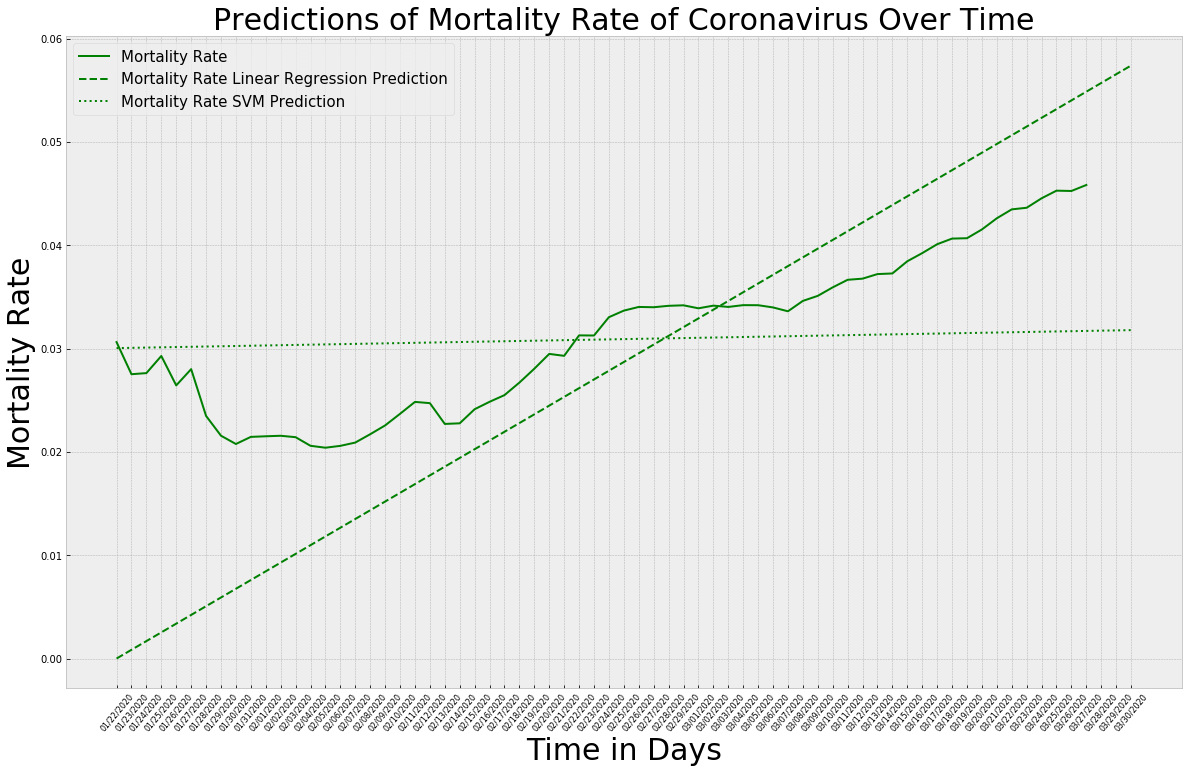

In [108]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='green')
plt.plot(future_forcast_dates, linear_predDR, linestyle='dashed', color='green')
plt.plot(future_forcast_dates, svm_predDR, linestyle='dotted', color='green')
plt.title('Predictions of Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['Mortality Rate', 'Mortality Rate Linear Regression Prediction', 'Mortality Rate SVM Prediction'], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(rotation=50, size=8)
plt.show()